<a href="https://colab.research.google.com/github/SeyedJalaleddinMousavirad/Pytorch/blob/main/Linear_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load data
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
#The type of data is bunch that indeed is a dictionary
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
#To extract the shape of data
data.data.shape

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.target.shape

(569,)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
#Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.33)
N, D=x_train.shape

In [13]:
D

30

In [14]:
#Normalisation

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [15]:
#Build the model

model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [16]:
#Loss and Optimiser
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [17]:
#Convert data to torch data
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [18]:
y_test.shape

torch.Size([188, 1])

In [19]:
#Train the model
n_epoch=1000

train_losses=np.zeros(n_epoch)
test_losses=np.zeros(n_epoch)

for it in range(n_epoch):
  optimizer.zero_grad()

  #Forward pass
  outputs = model(x_train)
  loss = criterion (outputs, y_train)

  #Backward and optimise
  loss.backward()
  optimizer.step()

  #Get test loss
  outputs_test = model (x_test)
  loss_test = criterion(outputs_test,y_test)

  #Save loss
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if(it+1) % 50 ==0:
    print(f'Epoch {it+1}/{n_epoch}, train loss= {loss.item():.4f}, test loss={loss_test.item():.4f}')




Epoch 50/1000, train loss= 0.3968, test loss=0.3832
Epoch 100/1000, train loss= 0.2974, test loss=0.2714
Epoch 150/1000, train loss= 0.2439, test loss=0.2163
Epoch 200/1000, train loss= 0.2096, test loss=0.1835
Epoch 250/1000, train loss= 0.1856, test loss=0.1616
Epoch 300/1000, train loss= 0.1680, test loss=0.1460
Epoch 350/1000, train loss= 0.1544, test loss=0.1344
Epoch 400/1000, train loss= 0.1436, test loss=0.1255
Epoch 450/1000, train loss= 0.1348, test loss=0.1184
Epoch 500/1000, train loss= 0.1275, test loss=0.1128
Epoch 550/1000, train loss= 0.1212, test loss=0.1082
Epoch 600/1000, train loss= 0.1159, test loss=0.1044
Epoch 650/1000, train loss= 0.1112, test loss=0.1012
Epoch 700/1000, train loss= 0.1071, test loss=0.0984
Epoch 750/1000, train loss= 0.1035, test loss=0.0961
Epoch 800/1000, train loss= 0.1002, test loss=0.0941
Epoch 850/1000, train loss= 0.0972, test loss=0.0924
Epoch 900/1000, train loss= 0.0945, test loss=0.0909
Epoch 950/1000, train loss= 0.0921, test loss=0

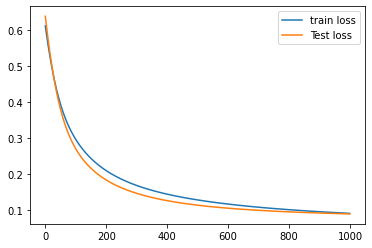

In [20]:
plt.plot(train_losses, label= 'train loss')
plt.plot(test_losses, label= 'Test loss')
plt.legend()
plt.show()

In [24]:
#get accuracy
with torch.no_grad():
  p_train = model (x_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean (y_train.numpy() ==p_train)
  
  p_test=model (x_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() ==p_test)

  print(f"train acc: {train_acc: .4f}, Test acc={test_acc:.4f}")


train acc:  0.9843, Test acc=0.9681
